In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

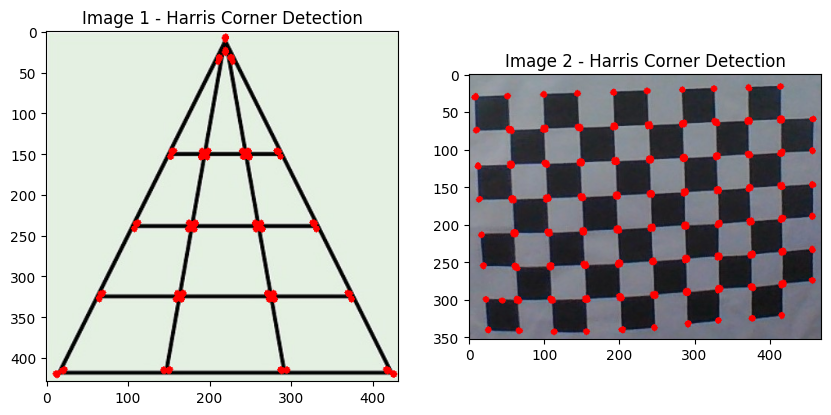

In [3]:
def harris_corner_detection(image, k=0.04, threshold=0.01):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    #  gradients (Ix, Iy)
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    #  derivatives at each pixel
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    # Gaussian filter to the derivative products
    Ixx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=1)
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=1)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

    # Harris response matrix
    height, width = gray.shape
    R = np.zeros_like(gray, dtype=np.float32)

    for y in range(height):
        for x in range(width):
            M = np.array([[Ixx[y, x], Ixy[y, x]],
                          [Ixy[y, x], Iyy[y, x]]])

            # Compute determinant and trace of M
            det_M = np.linalg.det(M)
            trace_M = np.trace(M)

            # Harris corner response formula: R = det(M) - k * (trace(M))^2
            R[y, x] = det_M - k * (trace_M ** 2)

    # Thresholding to find corners
    R_max = R.max()
    corners = np.zeros_like(R)
    corners[R > threshold * R_max] = 255

    return np.uint8(corners), R

def mark_corners(image, response, threshold_ratio=0.01):
    image_with_corners = image.copy()

    # Threshold to mark corners
    threshold = threshold_ratio * response.max()

    # Loop through the response to find where corners exist
    for y in range(response.shape[0]):
        for x in range(response.shape[1]):
            if response[y, x] > threshold:
                cv2.circle(image_with_corners, (x, y), 3, (0, 0, 255), -1)  # Red color in BGR

    return image_with_corners

# Load two images
image1 = cv2.imread('/content/img1.jpg')
image2 = cv2.imread('/content/img2.jpg')

# Detect corners in both images
corners1, response1 = harris_corner_detection(image1)
corners2, response2 = harris_corner_detection(image2)

# Mark the corners with red dots
image1_with_corners = mark_corners(image1, response1)
image2_with_corners = mark_corners(image2, response2)

# Display both images side by side using matplotlib
plt.figure(figsize=(10, 5))

# Original image 1 with corners
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Image 1 - Harris Corner Detection')

# Original image 2 with corners
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Image 2 - Harris Corner Detection')

plt.show()